In [88]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import importlib
import torch
from BaseballGame import BaseballGame
from SillyPitcher import SillyPitcher
import FNN_EventModeler
import matplotlib.pyplot as plt
importlib.reload(FNN_EventModeler)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'FNN_EventModeler' from '/Users/cartertegen/Desktop/Georgia Tech/23 Spring/CX 4240/4240 Baseball Project/scripts/BaseballGame/FNN_EventModeler.py'>

Average: 11.9692, STD: 4.956243674396972


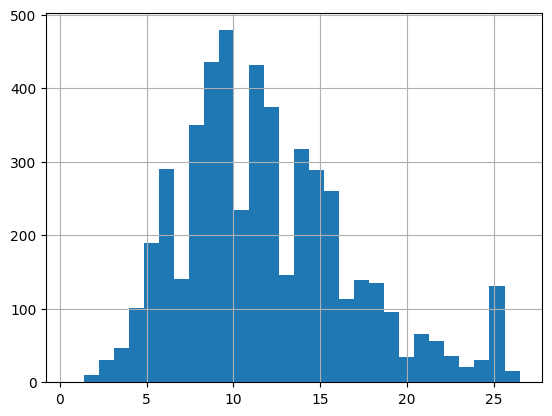

In [130]:
event_model_path = "/Users/cartertegen/Desktop/Georgia Tech/23 Spring/CX 4240/4240 Baseball Project/scripts/event/models/HL1_512_state.pt"
scaler_path = "/Users/cartertegen/Desktop/Georgia Tech/23 Spring/CX 4240/4240 Baseball Project/scripts/scaler.pkl"
pitcher = SillyPitcher()
event_modeler = FNN_EventModeler.FNN_EventModeler(event_model_path, scaler_path)

context = {
            "b_score": 0,
            "p_score": 0,
            "b_count": 0,
            "s_count": 0,
            "outs": 0,
            "pitch_num": 1,
            "on_1b": 0,
            "on_2b": 0,
            "on_3b": 0,
            "inning": 1,
            "p_isrighty": 1,
            "b_isrighty": 0,
            "is_top_inning": 1
        }

game = BaseballGame(pitcher, event_modeler)

runs_array = game.run_sim(n_games = 5000)


# x = game.run_sim(n_games = 10)
# %timeit -n 1 -r 100 game.run_sim(n_games = 1)
# game.run_sim(n_games = 1)
# %prun -D program.prof game.run_sim(n_games = 1)

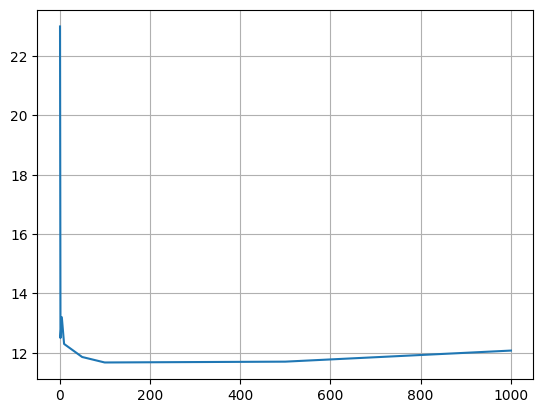

In [123]:
num_sims = [1, 2, 5, 10, 50, 100, 500, 1000]
averages = [23, 12.5, 13.2, 12.3, 11.86, 11.675, 11.703, 12.076]
plt.figure
plt.plot(num_sims, averages)
plt.grid()

In [14]:
import numpy as np
test = np.zeros((0, 5))
print(test)

[]


Average: 10.89, STD: 3.9589013627520453


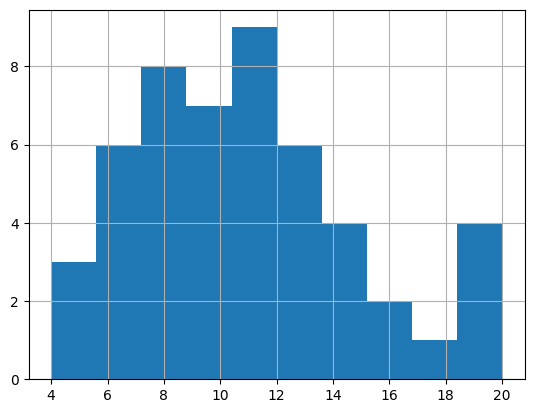

In [133]:
runs_array = game.run_sim(n_games = 10)
plt.figure
plt.hist(runs_array, bins = 10)
plt.grid()